### 20190327 agenda

* risk measure
    * VaR
* machine learning
    * supervised learning
    * unsupervised learning
* blockchain

#### Value at Risk (VaR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

headers = ["Date", "Open", "High", "Low", "Close", "Share Volume"]
df = pd.read_csv("./2330_20102018.csv", names = headers)
df['Date'] =pd.to_datetime(df.Date)
df.set_index("Date", inplace = True)
df.sort_values(by = "Date", inplace = True, ascending = True)

In [2]:
df.head(10)

Open   High    Low  Close  Share Volume
Date                                                
2010-01-04  47.35  47.35  46.62  47.28         39511
2010-01-05  47.35  47.42  46.55  46.98         38394
2010-01-06  46.98  47.28  46.40  47.28         52734
2010-01-07  47.28  47.35  46.77  46.77         53294
2010-01-08  46.26  46.84  46.26  46.62         48047
2010-01-11  46.62  47.28  46.26  46.98         37446
2010-01-12  46.91  46.91  46.11  46.33         52444
2010-01-13  45.89  45.96  45.60  45.75         49806
2010-01-14  46.33  46.33  45.89  46.04         39254
2010-01-15  45.82  46.26  45.75  46.26         50011

In [3]:
returns = df.Close.pct_change().dropna()

In [4]:
VaR_90 = returns.quantile(0.1)
VaR_95 = returns.quantile(0.05)
VaR_99 = returns.quantile(0.01)
VaR_9999 = returns.quantile(0.001)

h_VaR = {'90%': VaR_90, '95%': VaR_95, '99%': VaR_99, '99.99%': VaR_9999}
pd.DataFrame.from_dict(h_VaR, orient='index',columns=['VaR'])


VaR
90%    -0.015985
95%    -0.021574
99%    -0.035707
99.99% -0.062983

Max loss with 95% probability is less than -2.16% in single day.


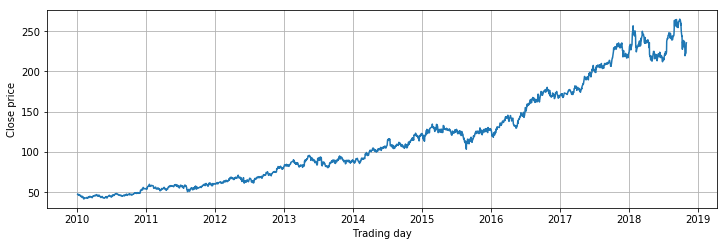

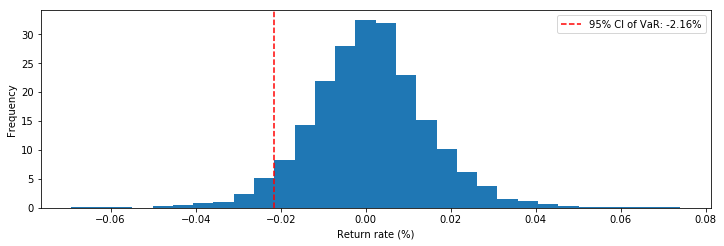

In [5]:
varg = np.percentile(returns, 5)

plt.figure(figsize = (12, 8))

plt.subplot(211)
plt.plot(df.index, df.Close)
plt.xlabel('Trading day')
plt.ylabel('Close price')
plt.grid()

plt.figure(figsize = (12, 8))
plt.subplot(212)
plt.hist(returns, density = True, bins = 30)
plt.xlabel('Return rate (%)')
plt.ylabel('Frequency')
plt.axvline(x = varg, color = 'r', linestyle = '--', label = '95% CI of VaR: ' + "{0:.2f}%".format(varg * 100))
plt.legend()

print ("Max loss with 95% probability is less than {0:.2f}% in single day.".format(np.percentile(returns, 5) * 100))

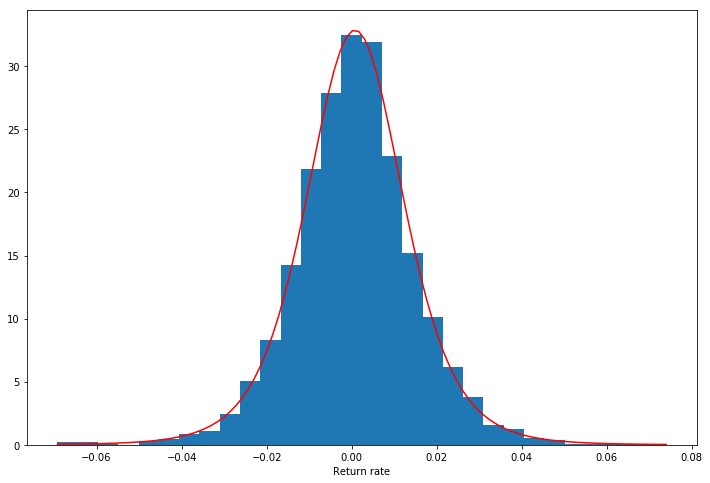

In [6]:
import scipy.stats

mean = returns.mean()
sigma = returns.std()
tdf, tmean, tsigma = scipy.stats.t.fit(returns)
support = np.linspace(returns.min(), returns.max(), 100)

plt.figure(figsize=(12, 8))
plt.hist(returns, bins = 30, density = True)
plt.plot(support, scipy.stats.t.pdf(support, loc = tmean, scale = tsigma, df = tdf), "r-")
plt.xlabel("Return rate")
plt.show()

In [7]:
scipy.stats.norm.ppf(0.05, mean, sigma)

-0.022579306679881082

In [8]:
_, pvalue = scipy.stats.jarque_bera(returns)
print(pvalue)

0.0


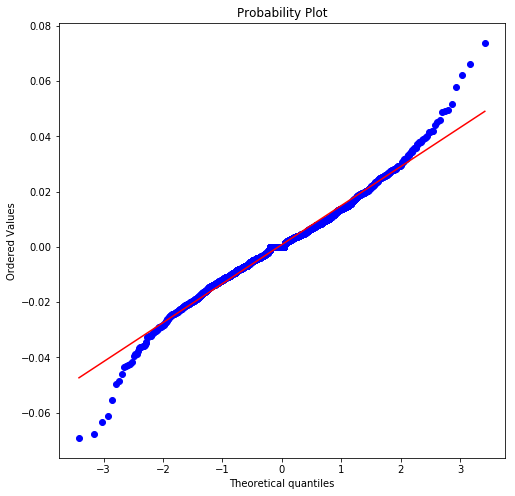

In [9]:
scipy.stats.probplot(returns.values, dist = scipy.stats.norm, plot = plt.figure(figsize=(8, 8)).add_subplot(111))
plt.show()

#### machine learning
* [hands-on tutorial of machine learning in python](https://github.com/twcmchang/hands-on-ML/blob/master/Hands-on%20Tutorial%20of%20Machine%20Learning%20in%20Python.pdf) by 張鈞閔

#### blockchain
* [a practical introduction to blockchain with python](http://adilmoujahid.com/posts/2018/03/intro-blockchain-bitcoin-python/) with [github code](https://github.com/adilmoujahid/blockchain-python-tutorial)